# Predicting housing prices using linear regression
## Introduction
The housing prices dataset contains prices of houses and their corresponding areas. In the following, we will apply a simple linear model to the dataset using linear regression.

The dataset has been retrieved from kaggle but is no longer available:
https://www.kaggle.com/merymery512/house-predection/data

## Data overview

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.lines as lines

import warnings
warnings.filterwarnings('ignore')

path ='C:/Users/Jonas/Desktop/MLData/Kaggle01/'
df = pd.read_csv(path + 'data.csv')

In [86]:
# The dataset consists of 545 elements:
print(df.shape)
print(df.columns.values)

(545, 2)
['loyer' 'surface']


__Rename columns:__

In [87]:
df.columns = ['Price', 'Area'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
Price    545 non-null int64
Area     545 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


In [88]:
# Price of first element
print(df.at[0,'Price'])
df.head()

1330


,Price,Area
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [89]:
df.describe()

,Price,Area
count,545.000000,545.000000
mean,2307.502752,63.236697
std,2201.364353,48.716475
min,488.000000,11.000000
25%,1255.000000,32.000000
50%,1795.000000,50.000000
75%,2600.000000,76.000000
max,25000.000000,415.000000


__Plot price as a function of area:__

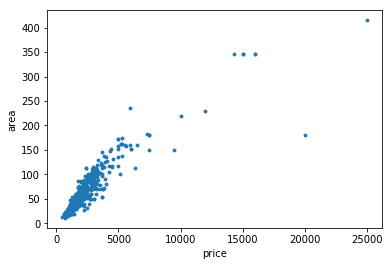

In [90]:
fig, ax = plt.subplots()
ax.scatter(x = df.Price, y = df.Area, s = 8)

plt.xlabel("price")
plt.ylabel("area")
plt.show()

## __Feature scaling__

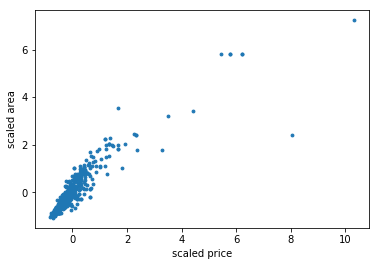

In [91]:
size = df.shape[0]

# scale price
p = np.array(df.loc[:,'Price'])
sclPrice = (p - p.mean()) / p.std()

# scale area
a = np.array(df.loc[:,'Area'])
sclArea = (a - a.mean()) / a.std()

fig, ax = plt.subplots()
ax.scatter(x = sclPrice, y = sclArea, s = 8)

plt.xlabel("scaled price")
plt.ylabel("scaled area")
plt.show()

## Linear Regression
__Draw arbitrary line of the form__

f(x) = mx + b

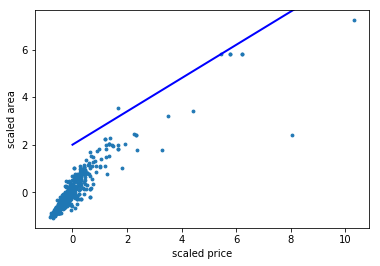

In [92]:
# arbitrary values
m = 0.7
b = 2
def f(x):
    return m*x+b

def drawGraph(x, y, s):
    fig, ax = plt.subplots()
    ax.scatter(x, y, s = 8)
    plt.xlabel(s+' price')
    plt.ylabel(s+' area')

    line1 = [(0, f(0)), (30000,f(30000))]
    (line1_xs, line1_ys) = zip(*line1)

    ax.add_line(lines.Line2D(line1_xs, line1_ys, linewidth=2, color='blue'))
    plt.show()
    
drawGraph(sclPrice, sclArea, 'scaled')

__Compute error of that line:__

In [93]:
def computeMSE(xvals, yvals):
    mse = 0
    for i in range(size):
        target = yvals[i]
        x = xvals[i]
        mse += (f(x)-target)**2
    mse *= 1/(2*size)
    return mse

print('Error before training', computeMSE(sclPrice, sclArea))
# compute error before training (unscaled) for later use
err = computeMSE(df.Price, df.Area)

Error before training 2.110312016374034


__Train model by adjusting m and b:__

In [94]:
alphaM = 0.15
alphaB = 0.15

def train():
    size = df.shape[0]
    global m
    global b
    mDerived = 0
    bDerived = 0

    for i in range(size):
        target = sclArea[i]
        x = sclPrice[i]
        mDerived += (f(x)-target) * x
        bDerived += (f(x)-target)

    mDerived /= size
    bDerived /= size

    m -= alphaM*mDerived
    b -= alphaB*bDerived
   
n = 50
display_step = 10
# train n times
for x in range(n):
    train()
    # compute new error
    if (x+1) % display_step == 0:
        print('Completed epoch', '%d' % (x+1), '/', '%d' % n,
              'Error', '%.5f' % computeMSE(sclPrice, sclArea))

Completed epoch 10 / 50 Error 0.16730
Completed epoch 20 / 50 Error 0.09199
Completed epoch 30 / 50 Error 0.08907
Completed epoch 40 / 50 Error 0.08895
Completed epoch 50 / 50 Error 0.08895


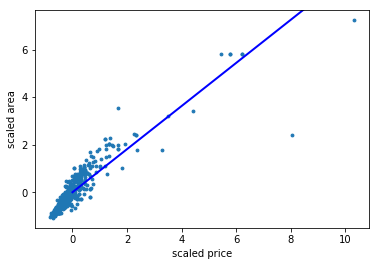

Error after training: 0.088950343598468
New m and b: f(x) = 0.9066359857616383 x + 0.000591529327425355


In [95]:
drawGraph(sclPrice, sclArea, 'scaled')
print('Error after training:', computeMSE(sclPrice,sclArea))
print('New m and b: f(x) =',m,'x +',b)

__Undo feature scaling:__

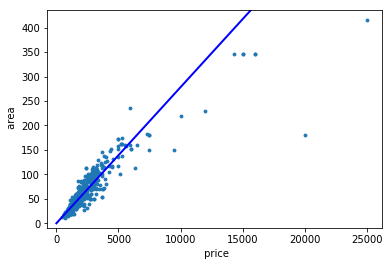

Error before training: 2325818.116357798
Error after training: 356.5526348012638


In [96]:
origPrice = sclPrice * p.std() + p.mean()
origArea = sclArea * a.std() + a.mean()

m = origArea[0]/origPrice[0]
scl = origArea[0]/sclPrice[0]
b *= scl

drawGraph(df.Price, df.Area, '')

newErr = computeMSE(df.Price,df.Area)
print('Error before training:',err)
print('Error after training:',newErr)

## Conclusion
We successfully applied a linear regression model to the dataset by gradually changing the parameters of the linear function. The model can now be used to predict the housing area given the price.